In [15]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objects as go
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('student-data.csv')
#renam passed as target
data.rename(columns={"passed": "target"}, inplace = True)
#relabel target to find failing students no:1 yes :0
data['target'] = data['target'].map({'no':0, 'yes':1})

data_f = data[data['sex'] == 'F']
data_m =  data[data['sex'] == 'M']

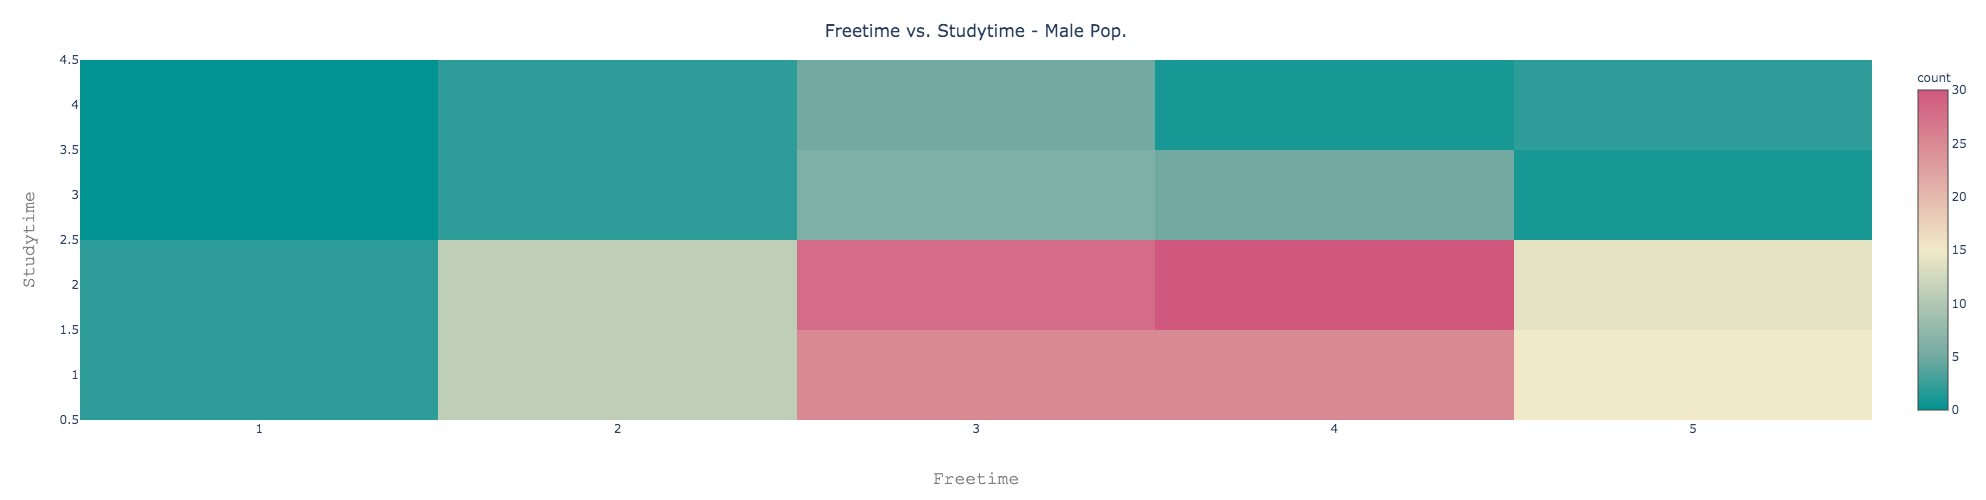

In [11]:
fig = px.density_heatmap(data_m, x="freetime", y="studytime", color_continuous_scale=px.colors.diverging.Tealrose, width=1400, height=500)
fig.update_layout(
    title=go.layout.Title(
        text="Freetime vs. Studytime - Male Pop.",
        xref="paper",
        x=0.5,
        y = .95
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Freetime",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Studytime",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)
fig.show()

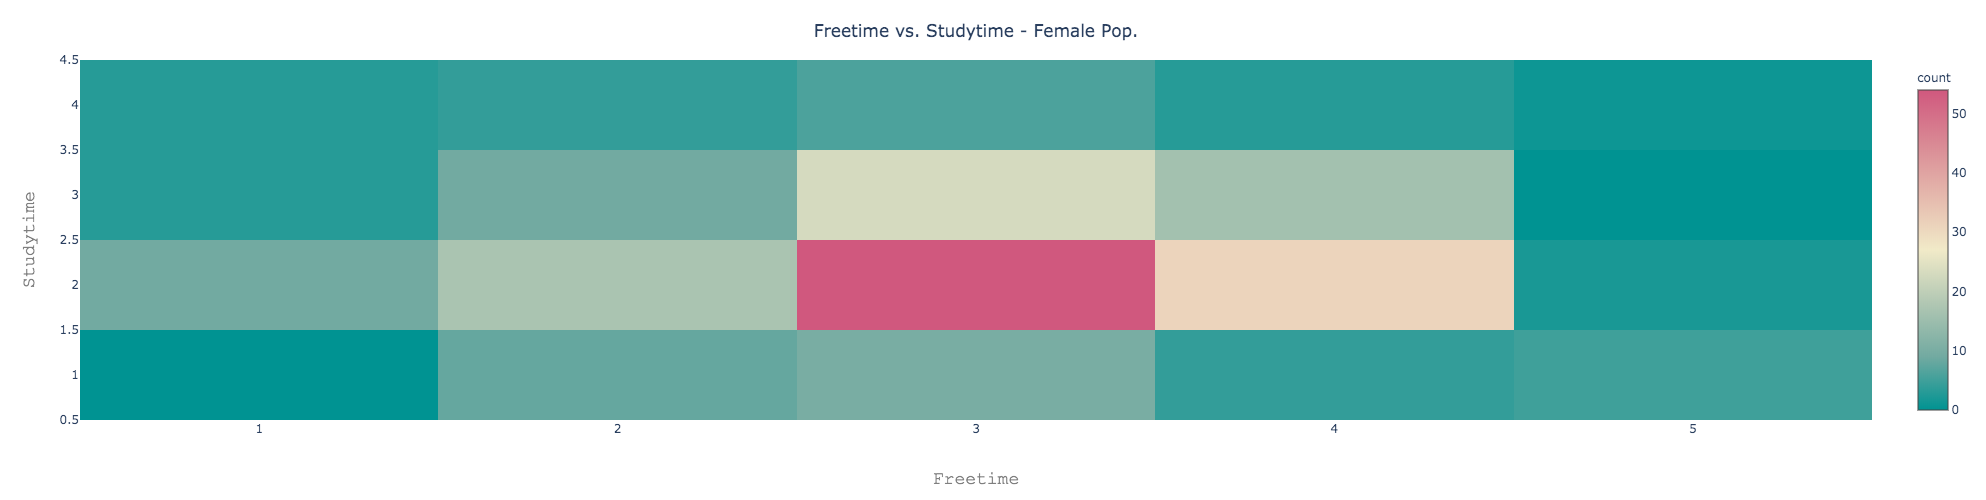

In [12]:
fig = px.density_heatmap(data_f, x="freetime", y="studytime", color_continuous_scale=px.colors.diverging.Tealrose, width=1400, height=500)
fig.update_layout(
    title=go.layout.Title(
        text="Freetime vs. Studytime - Female Pop.",
        xref="paper",
        x=0.5,
        y = .95
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Freetime",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Studytime",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)
fig.show()

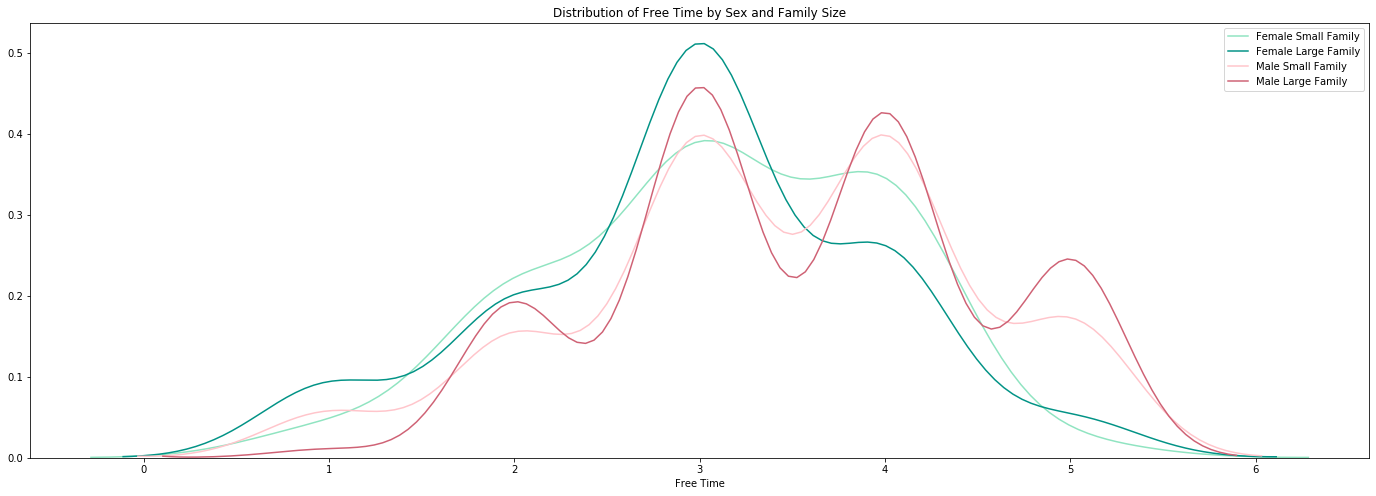

In [16]:
target_F = data.loc[data['sex']=='F']
target_M = data.loc[data['sex']=='M']
target_F_L3 = target_F.loc[target_F['famsize']=='LE3']
target_F_G3 = target_F.loc[target_F['famsize']=='GT3']
target_M_L3 = target_M.loc[target_M['famsize']=='LE3']
target_M_G3 = target_M.loc[target_M['famsize']=='GT3']
fig, ax = plt.subplots(figsize=(24,8))
sns.distplot(target_F_L3['freetime'], norm_hist = True, hist = False, color = '#90e4c1', kde=True, label = "Female Small Family").set_title('Distribution of Free Time by Sex and Family Size')#yellow
sns.distplot(target_F_G3['freetime'], norm_hist = True, hist = False, color = '#029386', kde=True, label = "Female Large Family")#yellow 
sns.distplot(target_M_L3['freetime'], norm_hist = True, hist = False, color = '#ffc5cb', kde=True, label = "Male Small Family")#blue
sns.distplot(target_M_G3['freetime'], norm_hist = True, hist = False, color = '#cf6275', kde=True,  label = "Male Large Family")#blue
plt.legend()
ax.set_xlabel('Free Time')
plt.show();

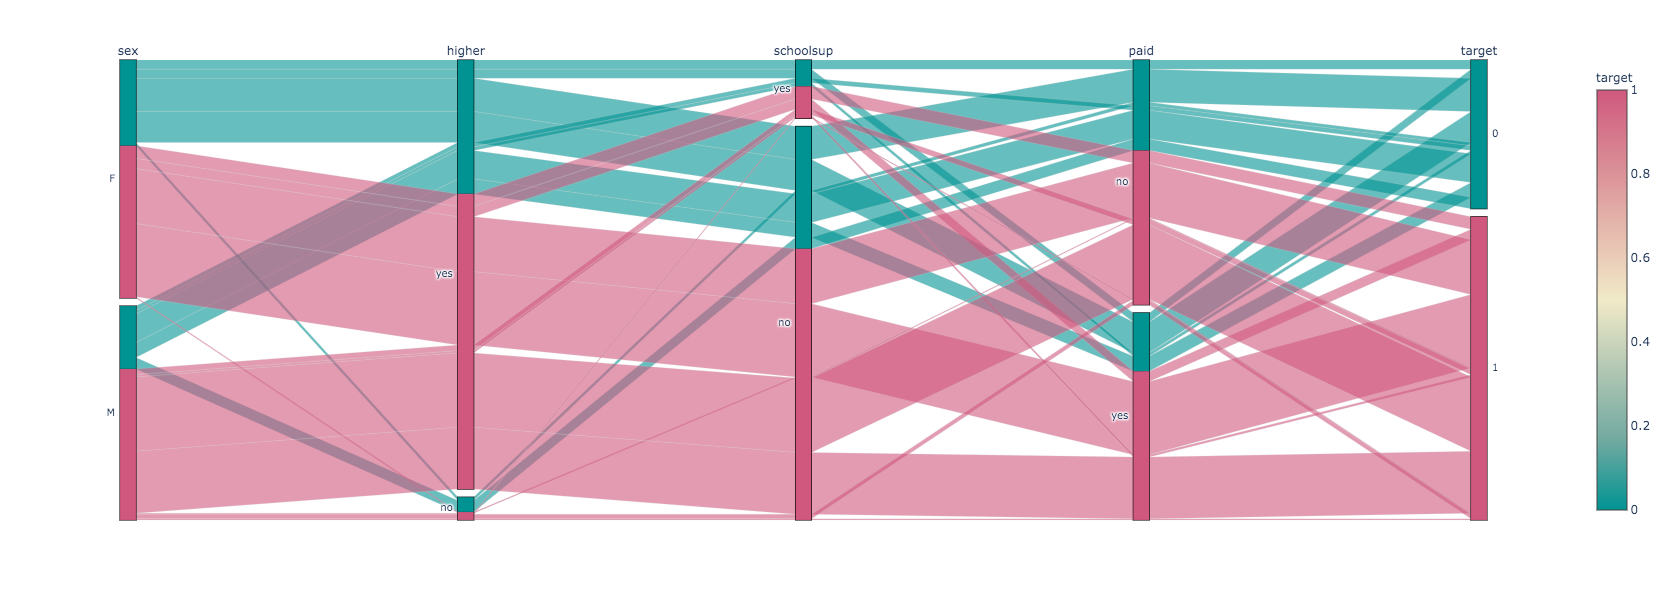

In [13]:
fig = px.parallel_categories(data[['sex','higher', 'schoolsup', 'paid','target']], color="target",
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=.5)
fig.show()